In [2]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
url = 'https://ca.finance.yahoo.com/mutualfunds/'
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')
table = soup.find('table',class_='W(100%)')
table.find_all('th')

header = [] #th-->table header
for th in table.find_all('th')[:-1]:
    header.append(th.text.strip())

data = [] #tr-->table record
for tr in table.find_all('tr')[1:]:
    row = []
    for td in tr.find_all('td')[:-1]:
        row.append(td.text.strip())
    data.append(row)
    
df =pd.DataFrame(data = data, columns=header)
df.to_csv('mutual_funds_data.csv', index = False)


In [3]:
df

,Symbol,Name,Change,% Change,Price (Intraday),50 Day Average,200 Day Average,3-Mo Return,YTD Return
0,0P0001DH7Y.TO,3iQ Global Cryptoasset Fund - Class A CAD,+1.47,+5.95%,24.71,22.62,21.61,46.71%,52.09%
1,0P00018ICG.TO,"Phillips, Hager & North Long Inflation-Linked ...",+0.38,+4.56%,8.32,8.69,9.01,-2.81%,-0.43%
2,0P00012FAT.TO,HSBC European Fund Institutional Series,+0.46,+3.84%,11.91,12.32,10.77,8.78%,9.01%
3,0P0001O25X.TO,HSBC European Fund D Series,+0.38,+3.84%,9.78,10.13,8.89,8.44%,8.69%
4,0P0000707A.TO,HSBC European Fund Investor Series,+1.09,+3.83%,28.41,29.43,25.89,8.17%,8.44%
5,0P00012ZOJ.TO,AIPM Junior Mining&Exploration UCITS Fund I,+3.50,+3.68%,95.12,99.78,100.77,N/A,N/A
6,0P00002707.TO,AIPM Junior Mining & Exploration UCITS Fund R Acc,+2.03,+3.67%,55.27,58.20,58.78,N/A,N/A
7,0P00012ZOK.TO,AIPM Junior Mining&Exploration UCITS Fund Retail,+2.84,+3.66%,77.59,81.70,82.52,N/A,N/A
8,0P0001CPBD.TO,"Phillips, Hager & North PRisM - Long Series O",+0.22,+3.31%,6.55,6.45,7.37,6.90%,13.27%
9,0P0001CPBB.TO,"Phillips, Hager & North Enhanced PRisM Long Fu...",+0.22,+3.08%,7.17,7.10,6.87,6.57%,12.24%


In [2]:
import pandas as pd

# Load the data from CSV file into a DataFrame
df = pd.read_csv('mutual_funds_data.csv')

# Get the summary statistics of the data
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)


         Change  Price (Intraday)  50 Day Average  200 Day Average
count  25.00000         25.000000       25.000000        25.000000
mean    0.87440         25.765600       27.122400        29.129600
std     1.00339         29.982041       31.838365        40.925319
min     0.22000          6.550000        6.450000         6.870000
25%     0.27000          9.030000        9.240000         8.890000
50%     0.46000         12.700000       12.820000        11.770000
75%     0.80000         24.710000       25.940000        25.890000
max     3.50000        122.280000      130.830000       189.110000


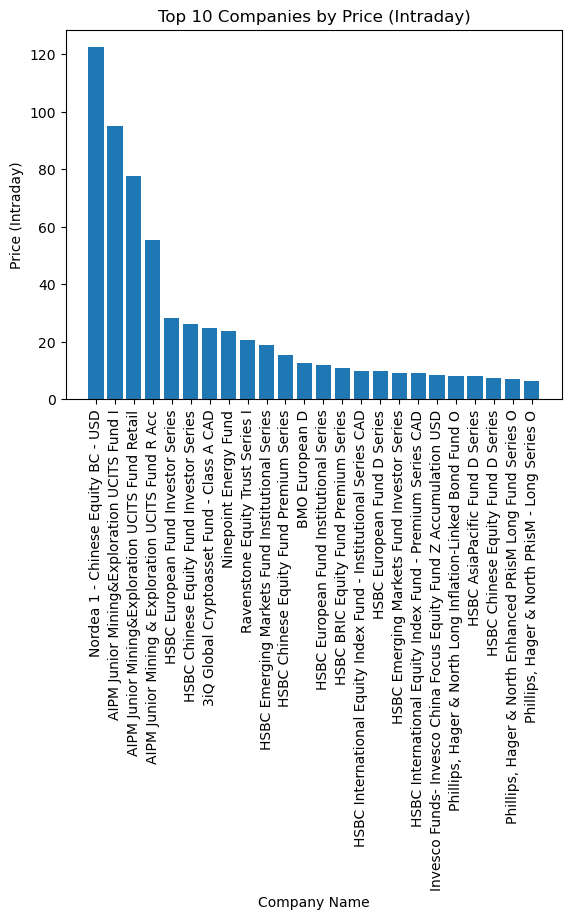

In [3]:
import matplotlib.pyplot as plt

names = df['Name']
prices = df['Price (Intraday)']

# Sort the data by price
df_sorted = df.sort_values(by='Price (Intraday)', ascending=False)

plt.bar(df_sorted['Name'], df_sorted['Price (Intraday)'])

plt.xlabel('Company Name')
plt.ylabel('Price (Intraday)')
plt.title('Top 10 Companies by Price (Intraday)')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

plt.show()


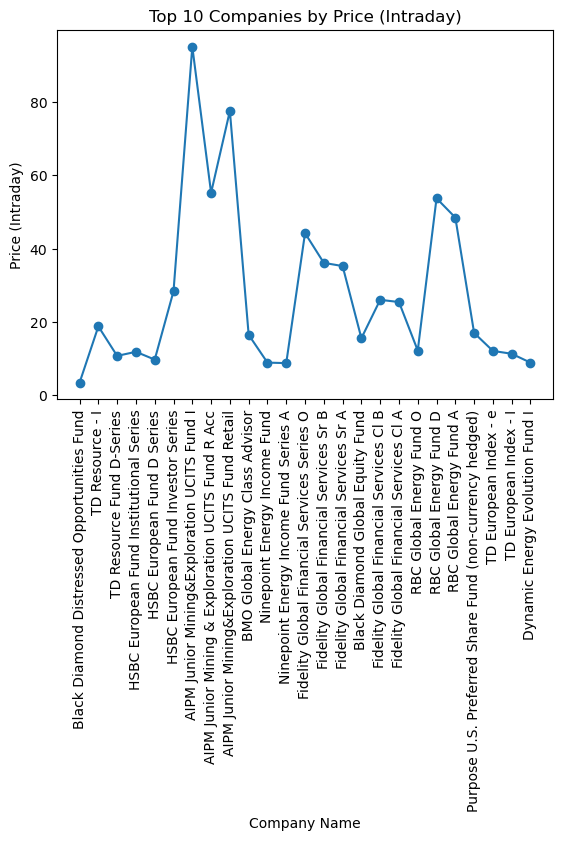

In [12]:
# Create the line chart
#plt.plot(names, prices, marker='o')

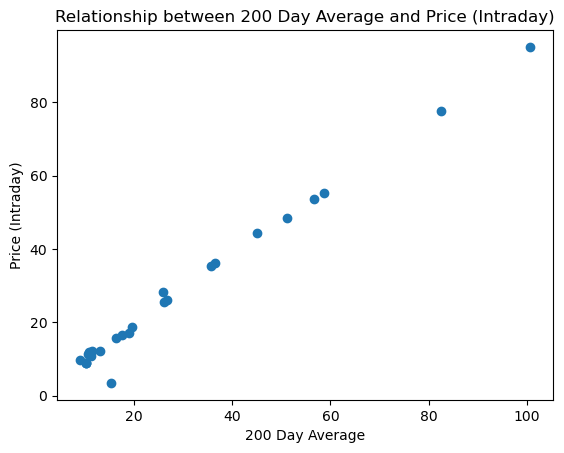

In [15]:
# Create a scatter plot
plt.scatter(df['200 Day Average'], df['Price (Intraday)'])

# Add labels and title
plt.xlabel('200 Day Average')
plt.ylabel('Price (Intraday)')
plt.title('Relationship between 200 Day Average and Price (Intraday)')

# Show the plot
plt.show()